In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [ ]:
FILE_NAME = '../project/mix_abalone_train.csv'

In [ ]:
abalone = pd.read_csv(FILE_NAME)
abalone.shape

(94792, 9)

In [ ]:
with open('unique.csv', mode = 'w') as f:

    for i in range(len(abalone.columns)):
        f.write(f'{abalone.columns[i]}, {abalone.iloc[:,i].unique()} \n')

In [ ]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
abalone.corr(numeric_only=True)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989600,0.911599,0.931092,0.908951,0.912522,0.910372,0.620809
Diameter,0.989600,1.000000,0.915261,0.933384,0.907634,0.913825,0.917211,0.634092
Height,0.911599,0.915261,1.000000,0.898076,0.857288,0.881601,0.899585,0.660468
Whole_weight,0.931092,0.933384,0.898076,1.000000,0.971160,0.973909,0.963767,0.613666
Shucked_weight,0.908951,0.907634,0.857288,0.971160,1.000000,0.948351,0.910346,0.510597
Viscera_weight,0.912522,0.913825,0.881601,0.973909,0.948351,1.000000,0.935596,0.584903
Shell_weight,0.910372,0.917211,0.899585,0.963767,0.910346,0.935596,1.000000,0.691610
Rings,0.620809,0.634092,0.660468,0.613666,0.510597,0.584903,0.691610,1.000000


In [ ]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

모든 변수에 대해 boxplot 다 확인하기

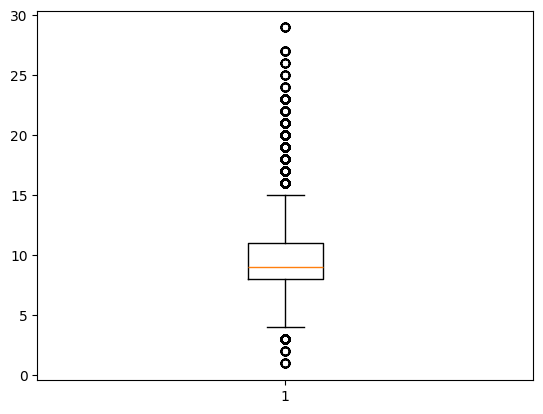

In [ ]:
plt.boxplot(abalone['Rings'])
plt.show()

In [ ]:
abalone['Rings'].describe()

,Rings
count,94792.000000
mean,9.707233
std,3.178704
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


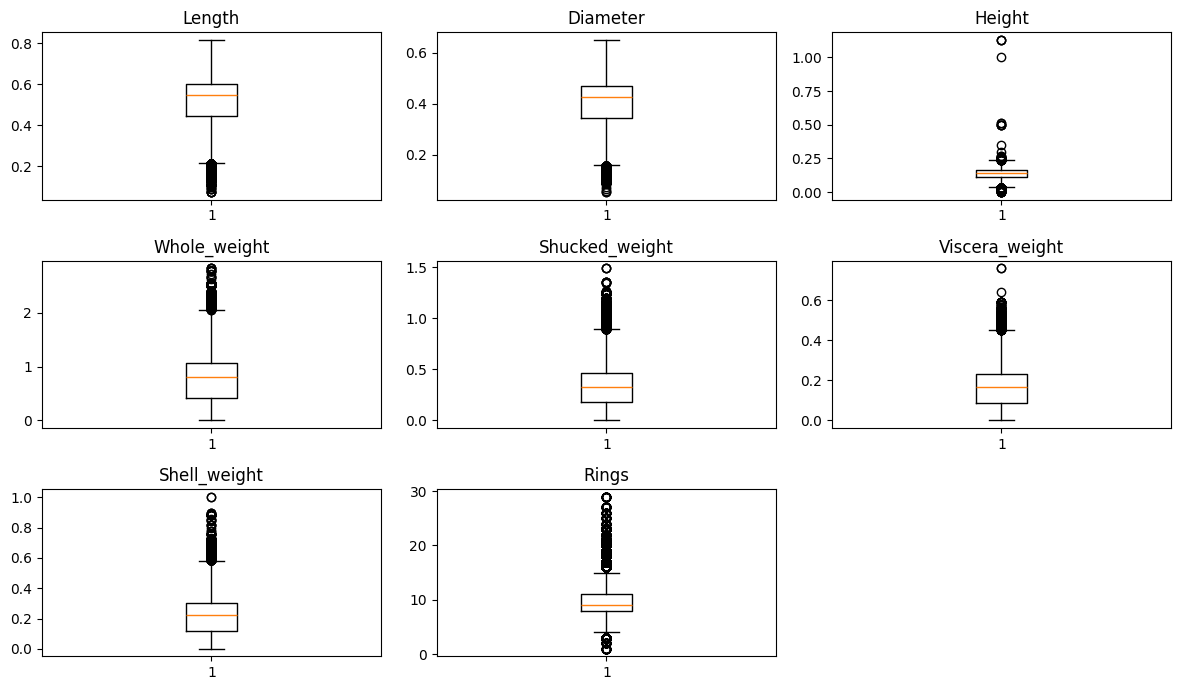

In [ ]:
col = 3
row = len(abalone.columns)// 3

plt.figure(figsize=(12,7))

# 수치형 데이터만 boxplot 그리도록
for i, column_name in enumerate(abalone.select_dtypes(include=np.number).columns,1):
  # 인덱스를 1로 지정
  plt.subplot(col, row, i)
  plt.title(column_name)
  plt.boxplot(abalone[column_name])

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [ ]:
abalone = abalone[abalone['Height'] != 0.].copy()
abalone.reset_index(inplace=True, drop=True)
abalone.shape

(94784, 9)

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [ ]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [ ]:
abalone = pd.get_dummies(abalone)

In [ ]:
abalone.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:
abalone.replace(True, 1, inplace = True)
abalone.replace(False, 0, inplace = True)

In [ ]:
abalone['Rings'] = abalone['Rings'] + 1.5

In [ ]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,12.5,1,0,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,12.5,1,0,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,7.5,0,1,0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,11.5,0,0,1
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,10.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
94780,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
94781,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
94782,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


각 컬럼 데이터 분포 그래프 확인

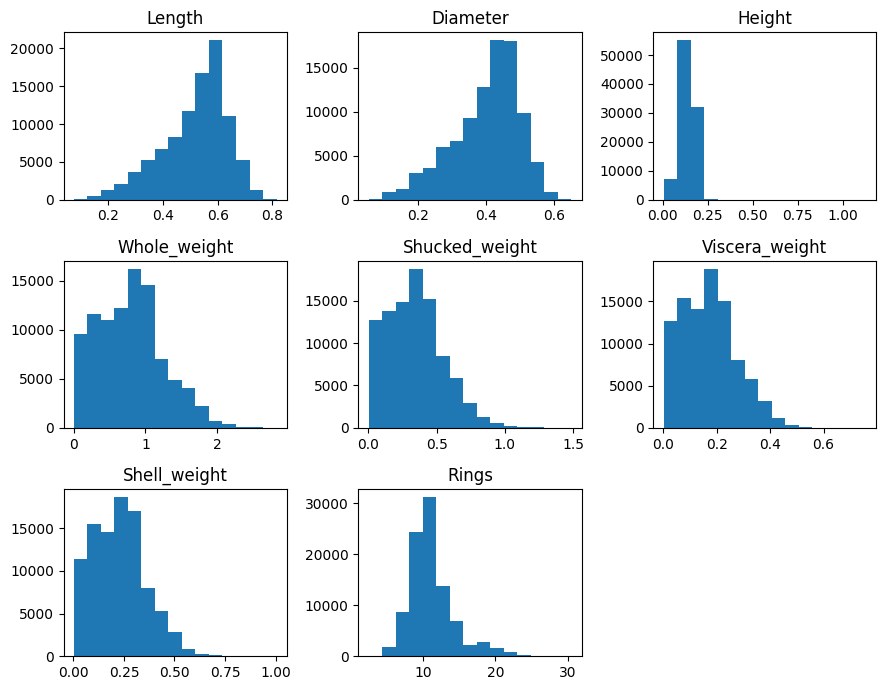

In [ ]:
col = 3
row = len(abalone.loc[:,"Length":"Rings"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(abalone.loc[:,"Length":"Rings"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(abalone[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [ ]:
from scipy.stats import boxcox

# Box-Cox 변환
for col in ["Length", "Diameter"]:  # 1D 데이터로 변환해야 함
    abalone[col], _ = boxcox(abalone[col])  # 결과값과 λ 값 반환 (λ는 무시 가능)

# 제곱근 변환
abalone.loc[:, "Height":"Rings"] = np.sqrt(abalone.loc[:, "Height":"Rings"])


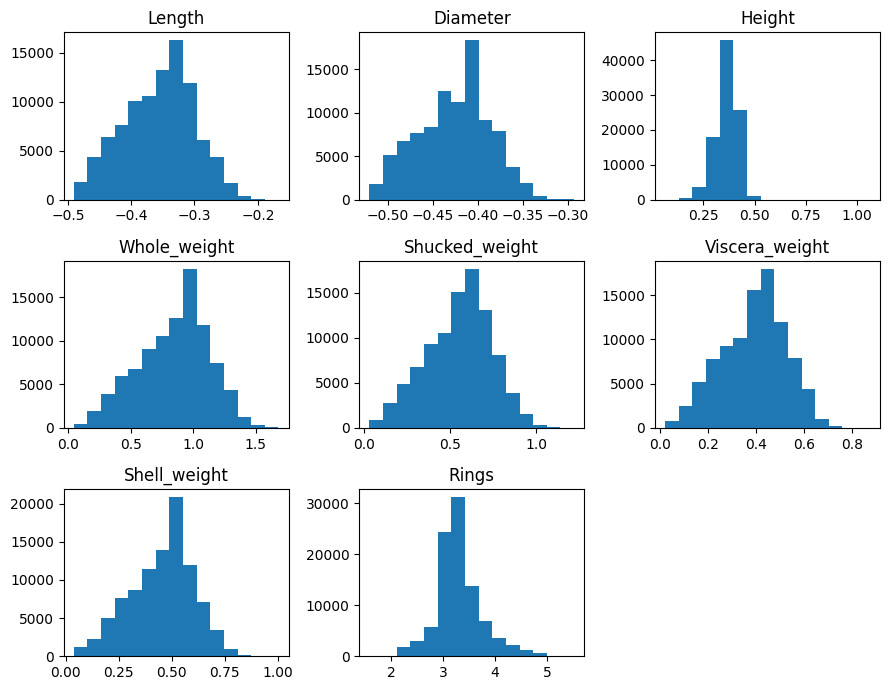

In [ ]:
col = 3
row = len(abalone.loc[:,"Length":"Rings"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(abalone.loc[:,"Length":"Rings"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(abalone[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

In [ ]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,-0.346397,-0.418419,0.387298,0.878351,0.573149,0.382753,0.489898,3.535534,1,0,0
1,-0.299892,-0.388945,0.380789,1.063015,0.676757,0.525833,0.565685,3.535534,1,0,0
2,-0.481068,-0.514495,0.158114,0.144914,0.074162,0.054772,0.070711,2.738613,0,1,0
3,-0.321036,-0.396643,0.387298,0.956295,0.612781,0.453321,0.500000,3.391165,0,0,1
4,-0.343680,-0.420717,0.360555,0.884308,0.607865,0.400000,0.444410,3.240370,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,-0.338171,-0.408986,0.406202,0.941807,0.608276,0.488876,0.498999,3.535534,1,0,0
94780,-0.323955,-0.413752,0.367423,0.982853,0.662571,0.463141,0.510392,3.391165,0,0,1
94781,-0.318091,-0.396643,0.452769,1.084435,0.724914,0.536190,0.554977,3.240370,0,0,1
94782,-0.302989,-0.391535,0.387298,1.046184,0.728697,0.510882,0.544059,3.391165,1,0,0


In [ ]:
feature_df = abalone[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']].copy()
target_sr = abalone['Rings']

In [ ]:
feature_df

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0,0,-0.346397,-0.418419,0.387298,0.878351,0.573149,0.382753,0.489898
1,1,0,0,-0.299892,-0.388945,0.380789,1.063015,0.676757,0.525833,0.565685
2,0,1,0,-0.481068,-0.514495,0.158114,0.144914,0.074162,0.054772,0.070711
3,0,0,1,-0.321036,-0.396643,0.387298,0.956295,0.612781,0.453321,0.500000
4,0,1,0,-0.343680,-0.420717,0.360555,0.884308,0.607865,0.400000,0.444410
...,...,...,...,...,...,...,...,...,...,...
94779,1,0,0,-0.338171,-0.408986,0.406202,0.941807,0.608276,0.488876,0.498999
94780,0,0,1,-0.323955,-0.413752,0.367423,0.982853,0.662571,0.463141,0.510392
94781,0,0,1,-0.318091,-0.396643,0.452769,1.084435,0.724914,0.536190,0.554977
94782,1,0,0,-0.302989,-0.391535,0.387298,1.046184,0.728697,0.510882,0.544059


In [ ]:
feature_df.describe()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000
mean,0.293320,0.363236,0.343444,-0.356435,-0.426195,0.364276,0.843531,0.553012,0.390141,0.451946
std,0.455286,0.480935,0.474861,0.055718,0.039638,0.054381,0.281571,0.189186,0.133090,0.149046
min,0.000000,0.000000,0.000000,-0.490476,-0.520092,0.063246,0.044721,0.031623,0.022361,0.038730
25%,0.000000,0.000000,0.000000,-0.397620,-0.454105,0.331662,0.647688,0.421307,0.294958,0.346410
50%,0.000000,0.000000,0.000000,-0.349088,-0.420717,0.374166,0.894148,0.574456,0.407431,0.474342
75%,1.000000,1.000000,1.000000,-0.318091,-0.399160,0.400000,1.035616,0.681542,0.482701,0.552268
max,1.000000,1.000000,1.000000,-0.167437,-0.293322,1.063015,1.680922,1.219836,0.871780,1.002497


In [ ]:
target_sr.describe()

,Rings
count,94784.000000
mean,3.316488
std,0.456415
min,1.581139
25%,3.082207
50%,3.240370
75%,3.535534
max,5.522681


## [2] test, train 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df,target_sr, test_size=0.2, random_state=12)

In [ ]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (75827, 10), y_train : (75827,)
x_test : (18957, 10) , y_test : (18957,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_v = MinMaxScaler()
scaler_v.fit(x_train)

MinMaxScaler()

In [ ]:
scaler_v.min_, scaler_v.data_min_

(array([ 0.        ,  0.        ,  0.        ,  1.51831957,  2.2934749 ,
        -0.0712591 , -0.02733244, -0.02661372, -0.02632467, -0.04018589]),
 array([ 0.        ,  0.        ,  0.        , -0.49047648, -0.52009242,
         0.07071068,  0.04472136,  0.03162278,  0.02236068,  0.03872983]))

In [ ]:
scaler_v.scale_, scaler_v.data_max_

(array([1.        , 1.        , 1.        , 3.09560115, 4.40974494,
        1.00775579, 0.61117185, 0.84159975, 1.17727514, 1.03759513]),
 array([ 1.        ,  1.        ,  1.        , -0.16743745, -0.29332193,
         1.06301458,  1.68092237,  1.21983605,  0.87177979,  1.00249688]))

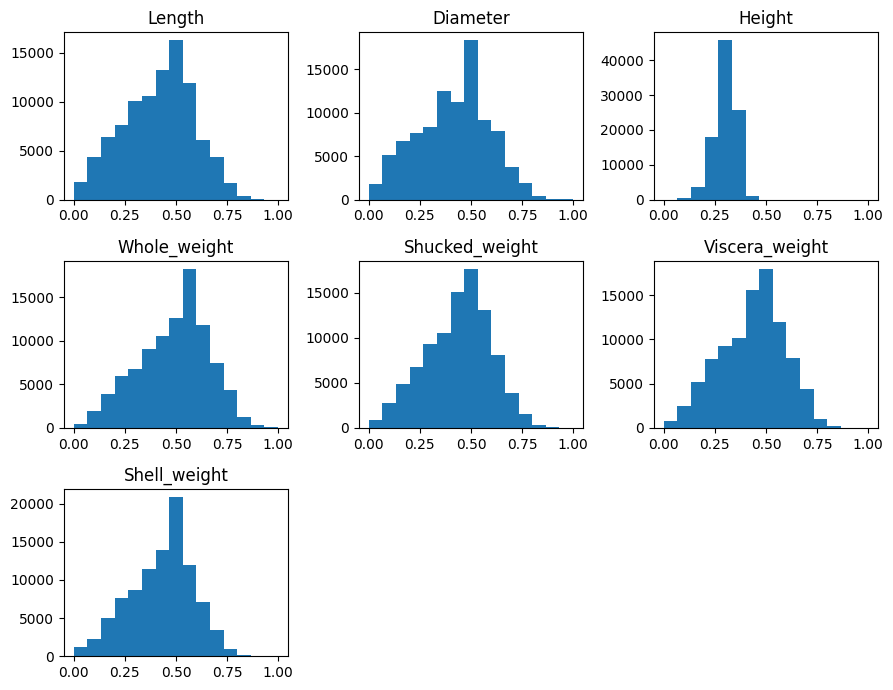

In [ ]:
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(feature_df)
x_scaled = pd.DataFrame(x_scaled, columns=feature_df.columns)

col = 3
row = len(x_scaled.loc[:,"Length":"Shell_weight"].columns)//3 + 1

plt.figure(figsize=(9,7))

for i, column_name in enumerate(x_scaled.loc[:,"Length":"Shell_weight"].columns,1): # 인덱스를 1로 지정
  plt.subplot(col, row, i)

  plt.title(column_name)
  plt.hist(x_scaled[column_name], bins=15)

plt.tight_layout() # 간격 사이 조정을 위해 사용
plt.show()

(array([2.6000e+01, 3.0000e+01, 1.8600e+03, 2.9770e+03, 5.6690e+03,
        2.4460e+04, 3.1251e+04, 1.3880e+04, 6.9100e+03, 3.6810e+03,
        2.1230e+03, 1.2040e+03, 5.7200e+02, 7.3000e+01, 6.8000e+01]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

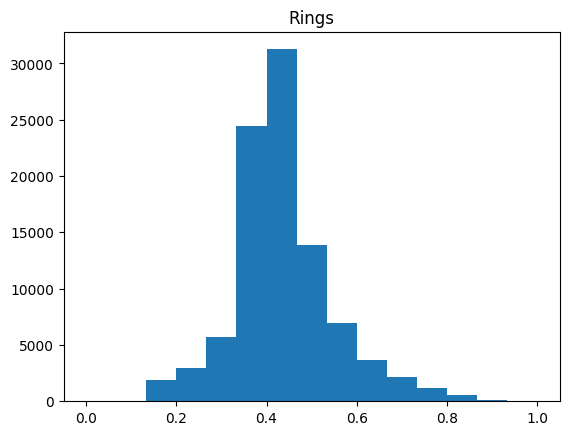

In [ ]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target_sr.values.reshape(-1, 1))

y_scaled = pd.DataFrame(y_scaled)

plt.title("Rings")
plt.hist(y_scaled, bins=15)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.shape

(75827, 10)

In [ ]:
x_train_scaled.min(), x_train_scaled.max()

(Sex_F             0.0
 Sex_I             0.0
 Sex_M             0.0
 Length            0.0
 Diameter          0.0
 Height            0.0
 Whole_weight      0.0
 Shucked_weight    0.0
 Viscera_weight    0.0
 Shell_weight      0.0
 dtype: float64,
 Sex_F             1.0
 Sex_I             1.0
 Sex_M             1.0
 Length            1.0
 Diameter          1.0
 Height            1.0
 Whole_weight      1.0
 Shucked_weight    1.0
 Viscera_weight    1.0
 Shell_weight      1.0
 dtype: float64)

In [ ]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_test_scaled.shape

(18957, 10)

In [ ]:
x_test_scaled.min(), x_test_scaled.max()

(Sex_F             0.000000
 Sex_I             0.000000
 Sex_M             0.000000
 Length            0.016372
 Diameter          0.001615
 Height           -0.007523
 Whole_weight      0.021942
 Shucked_weight    0.000000
 Viscera_weight    0.000000
 Shell_weight      0.003836
 dtype: float64,
 Sex_F             1.000000
 Sex_I             1.000000
 Sex_M             1.000000
 Length            0.962730
 Diameter          0.941381
 Height            0.651942
 Whole_weight      1.000000
 Shucked_weight    0.915452
 Viscera_weight    1.000000
 Shell_weight      0.942521
 dtype: float64)

## [3_1] 앙상블 - Bagging

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=12, oob_score= True)
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(oob_score=True, random_state=12)

In [ ]:
print(f'feature_names_in_ : {rf_model.feature_names_in_}')
print(f'n_features_in_ : {rf_model.n_features_in_}개')
print(f'feature_importances_ : {rf_model.feature_importances_}')

feature_names_in_ : ['Sex_F' 'Sex_I' 'Sex_M' 'Length' 'Diameter' 'Height' 'Whole_weight'
 'Shucked_weight' 'Viscera_weight' 'Shell_weight']
n_features_in_ : 10개
feature_importances_ : [0.00427544 0.00785887 0.00425015 0.03801936 0.03352456 0.03595553
 0.06642831 0.12600068 0.05893235 0.62475475]


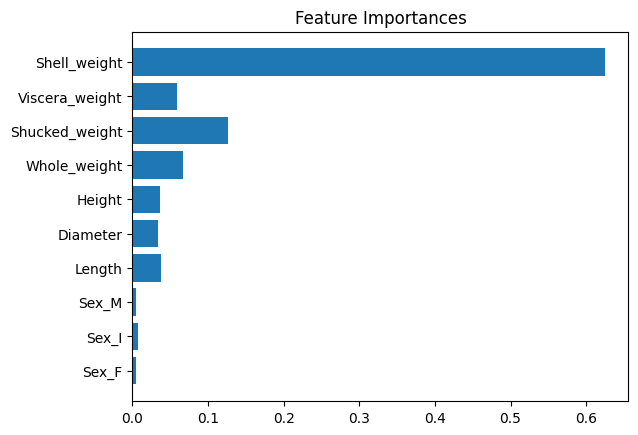

In [ ]:
plt.barh(range(rf_model.n_features_in_), rf_model.feature_importances_)
plt.yticks(range(rf_model.n_features_in_), rf_model.feature_names_in_)
plt.title('Feature Importances')
plt.show()

In [ ]:
print(f'oob_score_ : {rf_model.oob_score_}')

oob_score_ : 0.6792690640067092


In [ ]:
train_score = rf_model.score(x_train_scaled, y_train)
test_score = rf_model.score(x_test_scaled, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.9554185818812105, test_score : 0.6816547741691306


## [3-1_1] 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_depth' : range(5,20),
          'min_samples_leaf' : range(2,5),
          'criterion' : ['squared_error','poisson','friedman_mse']}

In [ ]:
rf_model = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv = GridSearchCV(rf_model, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv.best_score_] {search_cv.best_score_}')
print(f'[search_cv.best_param] {search_cv.best_params_}')
print(f'[search_cv.best_estimator_] {search_cv.best_estimator_}')

cv_result_df = pd.DataFrame(search_cv.cv_results_)
cv_result_df

[search_cv.best_score_] 0.6924261769041864
[search_cv.best_param] {'criterion': 'friedman_mse', 'max_depth': 14, 'min_samples_leaf': 4}
[search_cv.best_estimator_] RandomForestRegressor(criterion='friedman_mse', max_depth=14,
                      min_samples_leaf=4, oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.923773,0.363849,0.110681,0.011118,squared_error,5,2,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653570,0.649451,0.633733,0.651802,0.650403,0.647792,0.007165,131
1,11.877519,0.401469,0.110338,0.012344,squared_error,5,3,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653576,0.649463,0.633811,0.651813,0.650382,0.647809,0.007136,129
2,11.869373,0.368639,0.110885,0.011121,squared_error,5,4,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653583,0.649464,0.633870,0.651816,0.650382,0.647823,0.007114,127
3,14.239148,0.148057,0.121969,0.003761,squared_error,6,2,"{'criterion': 'squared_error', 'max_depth': 6,...",0.667420,0.666953,0.648731,0.667929,0.665786,0.663364,0.007351,125
4,14.211468,0.205213,0.120738,0.001824,squared_error,6,3,"{'criterion': 'squared_error', 'max_depth': 6,...",0.667409,0.666942,0.648913,0.668016,0.665773,0.663411,0.007286,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,39.080917,0.515021,0.441844,0.032193,friedman_mse,18,3,"{'criterion': 'friedman_mse', 'max_depth': 18,...",0.693398,0.692727,0.683518,0.691529,0.690201,0.690275,0.003550,61
131,37.588953,0.481712,0.426239,0.023554,friedman_mse,18,4,"{'criterion': 'friedman_mse', 'max_depth': 18,...",0.694435,0.693910,0.684577,0.692664,0.691667,0.691450,0.003570,29
132,41.867131,0.302983,0.554330,0.037629,friedman_mse,19,2,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.691254,0.690010,0.682359,0.690028,0.688827,0.688495,0.003163,89
133,40.052383,0.311725,0.457745,0.029870,friedman_mse,19,3,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.693116,0.692496,0.683109,0.691224,0.689750,0.689939,0.003605,69


In [ ]:
search_cv.best_estimator_.score(x_test_scaled,y_test )

0.6939265701364599

In [ ]:
params = {'max_depth' : range(5,20),
          'min_samples_leaf' : range(5,10),
          'criterion' : ['squared_error','poisson','friedman_mse']}

In [ ]:
rf_model_u = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_u = GridSearchCV(rf_model_u, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv_u.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_u.best_score_] {search_cv_u.best_score_}')
print(f'[search_cv_u.best_param] {search_cv_u.best_params_}')
print(f'[search_cv_u.best_estimator_] {search_cv_u.best_estimator_}')

cv_result_df_u = pd.DataFrame(search_cv_u.cv_results_)
cv_result_df_u

[search_cv_u.best_score_] 0.6928757917071424
[search_cv_u.best_param] {'criterion': 'poisson', 'max_depth': 15, 'min_samples_leaf': 9}
[search_cv_u.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=15, min_samples_leaf=9,
                      oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.642497,0.526572,0.100998,0.010514,squared_error,5,5,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653581,0.649449,0.633885,0.651820,0.650368,0.647821,0.007107,219
1,10.668863,0.321034,0.099601,0.006650,squared_error,5,6,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653583,0.649450,0.633889,0.651822,0.650369,0.647823,0.007106,217
2,10.594288,0.444412,0.104890,0.013144,squared_error,5,7,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653588,0.649448,0.633889,0.651827,0.650378,0.647826,0.007108,213
3,10.605078,0.468612,0.101316,0.007847,squared_error,5,8,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653597,0.649449,0.633889,0.651827,0.650381,0.647828,0.007109,211
4,10.693734,0.419763,0.101890,0.014830,squared_error,5,9,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653599,0.649443,0.633886,0.651820,0.650381,0.647826,0.007110,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,32.302951,0.479315,0.441260,0.050437,friedman_mse,19,5,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.694468,0.694530,0.684881,0.692878,0.692077,0.691767,0.003569,117
221,31.581551,0.507247,0.361055,0.004912,friedman_mse,19,6,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.694821,0.694892,0.685002,0.692926,0.692406,0.692009,0.003642,112
222,30.662147,0.350744,0.372061,0.050086,friedman_mse,19,7,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695365,0.695465,0.684965,0.693485,0.692844,0.692425,0.003869,78
223,29.765315,0.443311,0.368659,0.051791,friedman_mse,19,8,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695638,0.695675,0.684941,0.693291,0.693161,0.692541,0.003953,67


In [ ]:
search_cv_u.best_estimator_.score(x_test_scaled,y_test )

0.6951680794310469

In [ ]:
params = {'max_depth' : range(5,20),
          'min_samples_leaf' : range(10,15),
          'criterion' : ['squared_error','poisson','friedman_mse']}

In [ ]:
rf_model_u1 = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_u1 = GridSearchCV(rf_model_u1, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv_u1.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_u1.best_score_] {search_cv_u1.best_score_}')
print(f'[search_cv_u1.best_param] {search_cv_u1.best_params_}')
print(f'[search_cv_u1.best_estimator_] {search_cv_u1.best_estimator_}')

cv_result_df_u1 = pd.DataFrame(search_cv_u1.cv_results_)
cv_result_df_u1

[search_cv_u1.best_score_] 0.6929442953660061
[search_cv_u1.best_param] {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 11}
[search_cv_u1.best_estimator_] RandomForestRegressor(max_depth=15, min_samples_leaf=11, oob_score=True,
                      random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.204645,0.534030,0.102495,0.012664,squared_error,5,10,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653613,0.649432,0.633891,0.651820,0.650388,0.647829,0.007110,215
1,10.282283,0.721056,0.096637,0.008049,squared_error,5,11,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653613,0.649434,0.633881,0.651811,0.650398,0.647827,0.007114,219
2,10.080841,0.465114,0.096815,0.010100,squared_error,5,12,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653613,0.649444,0.633883,0.651801,0.650398,0.647828,0.007112,217
3,10.020308,0.418832,0.097346,0.010270,squared_error,5,13,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653612,0.649445,0.633881,0.651799,0.650419,0.647831,0.007114,213
4,9.914997,0.384991,0.095622,0.008010,squared_error,5,14,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653619,0.649445,0.633881,0.651799,0.650443,0.647838,0.007117,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,26.446606,0.060087,0.287373,0.003609,friedman_mse,19,10,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695952,0.695656,0.684688,0.693402,0.693418,0.692623,0.004111,75
221,25.499249,0.361059,0.301171,0.037337,friedman_mse,19,11,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.696241,0.695518,0.684828,0.693557,0.693747,0.692778,0.004105,33
222,24.854922,0.331194,0.278959,0.024120,friedman_mse,19,12,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.696028,0.695388,0.684787,0.693727,0.693587,0.692703,0.004068,54
223,24.513749,0.480552,0.272141,0.022499,friedman_mse,19,13,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695844,0.695451,0.684334,0.693558,0.693410,0.692519,0.004208,92


In [ ]:
search_cv_u1.best_estimator_.score(x_test_scaled,y_test )

0.6947452236879171

In [ ]:
params = {'max_depth' : range(5,20),
          'min_samples_leaf' : range(15,20),
          'criterion' : ['squared_error','poisson','friedman_mse']}

In [ ]:
rf_model_u2 = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_u2 = GridSearchCV(rf_model_u2, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv_u2.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_u2.best_score_] {search_cv_u2.best_score_}')
print(f'[search_cv_u2.best_param] {search_cv_u2.best_params_}')
print(f'[search_cv_u2.best_estimator_] {search_cv_u2.best_estimator_}')

cv_result_df_u2 = pd.DataFrame(search_cv_u2.cv_results_)
cv_result_df_u2

[search_cv_u2.best_score_] 0.6925656568621544
[search_cv_u2.best_param] {'criterion': 'poisson', 'max_depth': 15, 'min_samples_leaf': 15}
[search_cv_u2.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=15, min_samples_leaf=15,
                      oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.638018,0.497633,0.098324,0.004326,squared_error,5,15,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653626,0.649449,0.633882,0.651801,0.650471,0.647846,0.007120,219
1,11.009136,0.717334,0.104600,0.014418,squared_error,5,16,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653627,0.649450,0.633882,0.651799,0.650480,0.647848,0.007121,217
2,10.742711,0.408788,0.104744,0.008093,squared_error,5,17,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653633,0.649440,0.633887,0.651799,0.650485,0.647849,0.007120,213
3,10.799761,0.421796,0.102439,0.008845,squared_error,5,18,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653632,0.649434,0.633899,0.651788,0.650489,0.647849,0.007114,215
4,10.850263,0.616839,0.107414,0.011902,squared_error,5,19,"{'criterion': 'squared_error', 'max_depth': 5,...",0.653632,0.649436,0.633911,0.651782,0.650494,0.647851,0.007109,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,25.209114,0.232217,0.276914,0.022177,friedman_mse,19,15,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695895,0.695321,0.684129,0.693465,0.693352,0.692432,0.004271,18
221,24.698836,0.367786,0.279597,0.039999,friedman_mse,19,16,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695945,0.695282,0.683841,0.693529,0.693273,0.692374,0.004385,35
222,24.364822,0.441185,0.271018,0.031040,friedman_mse,19,17,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695693,0.695221,0.683667,0.693387,0.693048,0.692203,0.004388,61
223,24.077433,0.404344,0.261122,0.016189,friedman_mse,19,18,"{'criterion': 'friedman_mse', 'max_depth': 19,...",0.695415,0.695173,0.683511,0.693303,0.692959,0.692072,0.004391,79


In [ ]:
search_cv_u2.best_estimator_.score(x_test_scaled,y_test )

0.6950521682269433

In [ ]:
params = {'max_depth' : range(20,40),
          'min_samples_leaf' : range(2,5),
          'criterion' : ['squared_error','poisson','friedman_mse']}

In [ ]:
rf_model_u3 = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_u3 = GridSearchCV(rf_model_u3, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv_u3.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_u3.best_score_] {search_cv_u3.best_score_}')
print(f'[search_cv_u3.best_param] {search_cv_u3.best_params_}')
print(f'[search_cv_u3.best_estimator_] {search_cv_u3.best_estimator_}')

cv_result_df3 = pd.DataFrame(search_cv_u3.cv_results_)
cv_result_df3

[search_cv_u3.best_score_] 0.6910539517132204
[search_cv_u3.best_param] {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_leaf': 4}
[search_cv_u3.best_estimator_] RandomForestRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=4, oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,35.946948,0.836443,0.460832,0.026438,squared_error,20,2,"{'criterion': 'squared_error', 'max_depth': 20...",0.691032,0.689853,0.681770,0.689760,0.688650,0.688213,0.003309,122
1,33.380229,0.504018,0.429358,0.030287,squared_error,20,3,"{'criterion': 'squared_error', 'max_depth': 20...",0.692905,0.692134,0.682787,0.690941,0.689590,0.689671,0.003620,61
2,32.051734,0.865227,0.423128,0.058717,squared_error,20,4,"{'criterion': 'squared_error', 'max_depth': 20...",0.694170,0.693610,0.684201,0.692143,0.691030,0.691031,0.003588,2
3,36.557006,0.453785,0.512132,0.035194,squared_error,21,2,"{'criterion': 'squared_error', 'max_depth': 21...",0.690934,0.689605,0.681631,0.689248,0.687868,0.687857,0.003262,124
4,34.146054,0.410046,0.441297,0.035779,squared_error,21,3,"{'criterion': 'squared_error', 'max_depth': 21...",0.692521,0.692034,0.682606,0.690694,0.688999,0.689371,0.003596,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,35.015302,0.812272,0.474350,0.045178,friedman_mse,38,3,"{'criterion': 'friedman_mse', 'max_depth': 38,...",0.692166,0.691399,0.682002,0.690272,0.688628,0.688894,0.003645,102
176,33.008659,0.395625,0.398138,0.007081,friedman_mse,38,4,"{'criterion': 'friedman_mse', 'max_depth': 38,...",0.693547,0.693185,0.683744,0.691866,0.690542,0.690577,0.003577,18
177,38.015045,0.347014,0.540286,0.036339,friedman_mse,39,2,"{'criterion': 'friedman_mse', 'max_depth': 39,...",0.689819,0.688967,0.680577,0.688454,0.687166,0.686997,0.003323,159
178,35.052403,0.881741,0.450599,0.010853,friedman_mse,39,3,"{'criterion': 'friedman_mse', 'max_depth': 39,...",0.692182,0.691443,0.682016,0.690283,0.688649,0.688915,0.003650,95


In [ ]:
search_cv_u3.best_estimator_.score(x_test_scaled,y_test )

0.6911278526570576

In [ ]:
params = {'max_depth' : range(20,30),
          'min_samples_leaf' : range(5,10),
          'criterion' : ['squared_error','poisson','friedman_mse']}

In [ ]:
rf_model_u3 = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_u3 = GridSearchCV(rf_model_u3, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv_u3.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_u3.best_score_] {search_cv_u3.best_score_}')
print(f'[search_cv_u3.best_param] {search_cv_u3.best_params_}')
print(f'[search_cv_u3.best_estimator_] {search_cv_u3.best_estimator_}')

cv_result_df3 = pd.DataFrame(search_cv_u3.cv_results_)
cv_result_df3

[search_cv_u3.best_score_] 0.6926445083708518
[search_cv_u3.best_param] {'criterion': 'poisson', 'max_depth': 20, 'min_samples_leaf': 9}
[search_cv_u3.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=20, min_samples_leaf=9,
                      oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,29.670043,0.719822,0.365706,0.049636,squared_error,20,5,"{'criterion': 'squared_error', 'max_depth': 20...",0.694338,0.694386,0.684778,0.692742,0.691924,0.691634,0.003555,121
1,28.086305,0.115734,0.327210,0.022140,squared_error,20,6,"{'criterion': 'squared_error', 'max_depth': 20...",0.694751,0.694851,0.684980,0.692823,0.692325,0.691946,0.003626,92
2,27.457117,0.113836,0.363034,0.033591,squared_error,20,7,"{'criterion': 'squared_error', 'max_depth': 20...",0.695336,0.695427,0.684867,0.693394,0.692808,0.692366,0.003890,62
3,26.567647,0.200987,0.346281,0.031842,squared_error,20,8,"{'criterion': 'squared_error', 'max_depth': 20...",0.695648,0.695689,0.684947,0.693233,0.693147,0.692533,0.003952,11
4,25.993633,0.160219,0.289917,0.019944,squared_error,20,9,"{'criterion': 'squared_error', 'max_depth': 20...",0.695742,0.695474,0.684772,0.693060,0.693544,0.692518,0.004012,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,30.219775,0.236571,0.385792,0.043879,friedman_mse,29,5,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.693953,0.694142,0.684539,0.692452,0.691642,0.691346,0.003529,135
146,29.041751,0.430313,0.330455,0.009550,friedman_mse,29,6,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.694504,0.694682,0.684840,0.692709,0.692125,0.691772,0.003605,103
147,28.095065,0.237618,0.333871,0.045134,friedman_mse,29,7,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.695160,0.695327,0.684773,0.693251,0.692689,0.692240,0.003874,80
148,27.309419,0.113228,0.301788,0.010836,friedman_mse,29,8,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.695491,0.695596,0.684867,0.693146,0.693032,0.692426,0.003936,60


In [ ]:
search_cv_u3.best_estimator_.score(x_test_scaled,y_test )

0.6944657509791299

In [ ]:
params = {'max_depth' : range(20,30),
          'min_samples_leaf' : range(10,15),
          'criterion' : ['squared_error','poisson','friedman_mse']}

In [ ]:
rf_model_u4 = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_u4 = GridSearchCV(rf_model_u4, param_grid=params, scoring='r2',refit=True, cv=5, verbose=4)

In [ ]:
search_cv_u4.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_u4.best_score_] {search_cv_u4.best_score_}')
print(f'[search_cv_u4.best_param] {search_cv_u4.best_params_}')
print(f'[search_cv_u4.best_estimator_] {search_cv_u4.best_estimator_}')

cv_result_df4 = pd.DataFrame(search_cv_u4.cv_results_)
cv_result_df4

[search_cv_u4.best_score_] 0.6927888815244547
[search_cv_u4.best_param] {'criterion': 'poisson', 'max_depth': 20, 'min_samples_leaf': 11}
[search_cv_u4.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=20, min_samples_leaf=11,
                      oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,34.105951,1.722049,0.366766,0.027862,squared_error,20,10,"{'criterion': 'squared_error', 'max_depth': 20...",0.695958,0.695624,0.684686,0.693390,0.693404,0.692613,0.004106,77
1,32.416292,0.658720,0.351632,0.023287,squared_error,20,11,"{'criterion': 'squared_error', 'max_depth': 20...",0.696209,0.695499,0.684819,0.693539,0.693709,0.692755,0.004098,5
2,31.940396,1.023035,0.348017,0.030917,squared_error,20,12,"{'criterion': 'squared_error', 'max_depth': 20...",0.696028,0.695379,0.684769,0.693697,0.693572,0.692689,0.004072,32
3,31.359016,0.787124,0.360564,0.042306,squared_error,20,13,"{'criterion': 'squared_error', 'max_depth': 20...",0.695836,0.695435,0.684315,0.693540,0.693411,0.692508,0.004211,112
4,30.468273,0.083365,0.318741,0.005185,squared_error,20,14,"{'criterion': 'squared_error', 'max_depth': 20...",0.695811,0.695360,0.684189,0.693503,0.693420,0.692456,0.004244,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,32.889821,0.529534,0.357757,0.023960,friedman_mse,29,10,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.695915,0.695582,0.684642,0.693312,0.693353,0.692561,0.004106,107
146,32.051508,0.272663,0.348905,0.025276,friedman_mse,29,11,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.696169,0.695472,0.684794,0.693502,0.693683,0.692724,0.004095,29
147,31.708606,0.394895,0.360230,0.036192,friedman_mse,29,12,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.695982,0.695366,0.684752,0.693663,0.693540,0.692661,0.004066,55
148,31.369899,0.329151,0.346522,0.028125,friedman_mse,29,13,"{'criterion': 'friedman_mse', 'max_depth': 29,...",0.695813,0.695419,0.684296,0.693522,0.693385,0.692487,0.004210,123


In [ ]:
search_cv_u4.best_estimator_.score(x_test_scaled,y_test )

0.694479523936865

### cv = 10으로 재진행

In [ ]:
best_params = {'max_depth' : [15],
          'min_samples_leaf' : [9],
          'criterion' : ['poisson'],
          'min_samples_split' : range(2,30),
          'max_features' : ['sqrt','log2',1.0]
          }

In [ ]:
rf_model_best = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_best = GridSearchCV(rf_model_best, param_grid=best_params, scoring='r2',refit=True, cv=10, verbose=4)

In [ ]:
search_cv_best.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_best.best_score_] {search_cv_best.best_score_}')
print(f'[search_cv_best.best_param] {search_cv_best.best_params_}')
print(f'[search_cv_best.best_estimator_] {search_cv_best.best_estimator_}')

cv_result_best = pd.DataFrame(search_cv_best.cv_results_)
cv_result_best

[search_cv_best.best_score_] 0.693831845649219
[search_cv_best.best_param] {'criterion': 'poisson', 'max_depth': 15, 'max_features': 1.0, 'min_samples_leaf': 9, 'min_samples_split': 29}
[search_cv_best.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=15, min_samples_leaf=9,
                      min_samples_split=29, oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,12.755151,0.295079,0.180069,0.076198,poisson,15,sqrt,9,2,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.690486,0.683657,0.681801,0.692559,0.697271,0.702955,0.685387,0.692852,0.007133,29
1,12.509821,0.453497,0.152669,0.011132,poisson,15,sqrt,9,3,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.690486,0.683657,0.681801,0.692559,0.697271,0.702955,0.685387,0.692852,0.007133,29
2,12.551499,0.158115,0.152284,0.011056,poisson,15,sqrt,9,4,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.690486,0.683657,0.681801,0.692559,0.697271,0.702955,0.685387,0.692852,0.007133,29
3,12.516562,0.166515,0.149714,0.008145,poisson,15,sqrt,9,5,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.690486,0.683657,0.681801,0.692559,0.697271,0.702955,0.685387,0.692852,0.007133,29
4,12.401904,0.274405,0.156052,0.013310,poisson,15,sqrt,9,6,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.690486,0.683657,0.681801,0.692559,0.697271,0.702955,0.685387,0.692852,0.007133,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,31.270885,0.471193,0.151630,0.013459,poisson,15,1.0,9,25,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.689078,0.686415,0.685232,0.694315,0.695306,0.704374,0.686442,0.693799,0.006562,5
80,30.994929,0.382277,0.148028,0.012454,poisson,15,1.0,9,26,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.689061,0.686394,0.685239,0.694316,0.695411,0.704377,0.686415,0.693817,0.006583,4
81,30.885556,0.484207,0.148308,0.010708,poisson,15,1.0,9,27,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.689069,0.686463,0.685132,0.694242,0.695473,0.704437,0.686407,0.693820,0.006610,3
82,30.672722,0.489383,0.142687,0.003484,poisson,15,1.0,9,28,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.689057,0.686488,0.685112,0.694352,0.695504,0.704408,0.686322,0.693829,0.006620,2


In [ ]:
search_cv_best.best_estimator_.score(x_test_scaled,y_test )

0.6953968757458809

In [ ]:
best_train_score = search_cv_best.best_estimator_.score(x_train_scaled, y_train)
best_test_score = search_cv_best.best_estimator_.score(x_test_scaled, y_test)

print(f'best_train_score : {best_train_score}, best_test_score : {best_test_score}')

best_train_score : 0.7685972441646246, best_test_score : 0.6953968757458809


In [ ]:
best_params = {'max_depth' : [15],
          'min_samples_leaf' : [9],
          'criterion' : ['poisson'],
          'min_samples_split' : range(30,60),
          'max_features' : ['sqrt','log2',1.0]
          }

In [ ]:
rf_model_best_1 = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_best_1 = GridSearchCV(rf_model_best_1, param_grid=best_params, scoring='r2',refit=True, cv=10, verbose=4)

In [ ]:
search_cv_best_1.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_best_1.best_score_] {search_cv_best_1.best_score_}')
print(f'[search_cv_best_1.best_param] {search_cv_best_1.best_params_}')
print(f'[search_cv_best_1.best_estimator_] {search_cv_best_1.best_estimator_}')

cv_result_best_1 = pd.DataFrame(search_cv_best_1.cv_results_)
cv_result_best_1

[search_cv_best_1.best_score_] 0.6938287230973634
[search_cv_best_1.best_param] {'criterion': 'poisson', 'max_depth': 15, 'max_features': 1.0, 'min_samples_leaf': 9, 'min_samples_split': 31}
[search_cv_best_1.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=15, min_samples_leaf=9,
                      min_samples_split=31, oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,15.447613,3.398530,0.153590,0.020848,poisson,15,sqrt,9,30,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.688983,0.683261,0.681295,0.692081,0.696041,0.702163,0.684326,0.691981,0.006997,31
1,12.592036,0.662014,0.147952,0.008929,poisson,15,sqrt,9,31,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.688384,0.683180,0.681081,0.690732,0.697061,0.701603,0.684098,0.691792,0.007157,43
2,12.776374,0.360148,0.160033,0.022956,poisson,15,sqrt,9,32,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.689261,0.682823,0.681721,0.691654,0.696604,0.702697,0.684583,0.691951,0.006947,35
3,12.789441,0.606604,0.159275,0.017748,poisson,15,sqrt,9,33,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.689235,0.682958,0.680546,0.691160,0.696634,0.702212,0.685509,0.691802,0.007021,41
4,12.619865,0.414467,0.148903,0.016448,poisson,15,sqrt,9,34,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.688370,0.683240,0.680893,0.691516,0.696953,0.701055,0.685174,0.691971,0.006962,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,29.601965,0.244083,0.136738,0.009133,poisson,15,1.0,9,55,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.688770,0.685121,0.683840,0.693765,0.696370,0.703376,0.685538,0.693281,0.006823,26
86,29.662722,0.305076,0.137733,0.011117,poisson,15,1.0,9,56,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.688744,0.685113,0.683803,0.693671,0.696397,0.703397,0.685452,0.693248,0.006833,27
87,29.498486,0.348568,0.135571,0.011717,poisson,15,1.0,9,57,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.688732,0.685115,0.683711,0.693688,0.696377,0.703368,0.685362,0.693208,0.006838,28
88,29.351529,0.252118,0.138041,0.014156,poisson,15,1.0,9,58,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.688679,0.685012,0.683591,0.693629,0.696361,0.703309,0.685390,0.693158,0.006847,29


In [ ]:
search_cv_best_1.best_estimator_.score(x_test_scaled,y_test )

0.6953805805167149

In [ ]:
best_params = {'max_depth' : [15],
          'min_samples_leaf' : [9],
          'criterion' : ['poisson'],
          'min_samples_split' : range(60,100),
          'max_features' : ['sqrt','log2',1.0]
          }

In [ ]:
rf_model_best_2 = RandomForestRegressor(random_state=12, oob_score= True)

In [ ]:
search_cv_best_2 = GridSearchCV(rf_model_best_2, param_grid=best_params, scoring='r2',refit=True, cv=10, verbose=4)

In [ ]:
search_cv_best_2.fit(x_train_scaled, y_train)

In [ ]:
print(f'[search_cv_best_2.best_score_] {search_cv_best_2.best_score_}')
print(f'[search_cv_best_2.best_param] {search_cv_best_2.best_params_}')
print(f'[search_cv_best_2.best_estimator_] {search_cv_best_2.best_estimator_}')

cv_result_best_2 = pd.DataFrame(search_cv_best_2.cv_results_)
cv_result_best_2

[search_cv_best_2.best_score_] 0.6931271936849402
[search_cv_best_2.best_param] {'criterion': 'poisson', 'max_depth': 15, 'max_features': 1.0, 'min_samples_leaf': 9, 'min_samples_split': 60}
[search_cv_best_2.best_estimator_] RandomForestRegressor(criterion='poisson', max_depth=15, min_samples_leaf=9,
                      min_samples_split=60, oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,11.406573,1.134292,0.131611,0.021001,poisson,15,sqrt,9,60,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.686736,0.681441,0.678595,0.690513,0.695414,0.700616,0.683802,0.690313,0.007154,41
1,10.739816,0.544025,0.127466,0.010788,poisson,15,sqrt,9,61,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.685949,0.680691,0.679102,0.689913,0.695255,0.699818,0.682594,0.689932,0.007269,45
2,10.749407,0.487789,0.127554,0.013773,poisson,15,sqrt,9,62,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.686282,0.680568,0.679010,0.689892,0.695820,0.699998,0.681975,0.689885,0.007329,51
3,11.061050,0.584136,0.130774,0.010732,poisson,15,sqrt,9,63,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.686551,0.680690,0.678894,0.690787,0.694966,0.699797,0.682515,0.690028,0.007239,43
4,11.442747,0.442500,0.133111,0.013123,poisson,15,sqrt,9,64,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.686767,0.680194,0.679161,0.689581,0.694588,0.700625,0.682060,0.689903,0.007375,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,27.464834,0.324143,0.116096,0.003283,poisson,15,1.0,9,95,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.687482,0.683642,0.681464,0.692362,0.695981,0.702339,0.683862,0.691878,0.007100,36
116,27.260607,0.236143,0.114461,0.003633,poisson,15,1.0,9,96,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.687440,0.683583,0.681393,0.692339,0.695987,0.702346,0.683805,0.691843,0.007120,37
117,27.155290,0.137174,0.114524,0.002462,poisson,15,1.0,9,97,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.687403,0.683559,0.681357,0.692370,0.695912,0.702305,0.683819,0.691816,0.007111,38
118,27.375573,0.235617,0.117517,0.000941,poisson,15,1.0,9,98,"{'criterion': 'poisson', 'max_depth': 15, 'max...",...,0.687423,0.683488,0.681286,0.692322,0.695851,0.702263,0.683790,0.691772,0.007114,39


In [ ]:
search_cv_best_2.best_estimator_.score(x_test_scaled,y_test )

0.6953297680474095